# The Battle of the Neighborhoods (Jeff ) - Crimes in Vancouver

## 1. A description of the problem and a discussion of the background

We will analyse and discuss the safiest place in Vancouver where, It would be safe for opening a new bussiness or even to live, by analysing the rate crime, and also those kinds of crimes, we will plot the map also to get know about if there is some park our beach around the place

## 2. A description of the data and how it will be used to solve the problem

To do our analyse we will use a open data set from Kaggle data contains Vancouver crimes rate in 2018 Considering the following information:

TYPE - Crime type, @
YEAR - Recorded year, @
MONTH - Recorded month, @
DAY - Recorded day, @
HOUR - Recorded hour, @
MINUTE - Recorded minute, @
HUNDRED_BLOCK - Recorded block, @
NEIGHBOURHOOD - Recorded neighborhood, @
X- GPS longtitude, @
Y - GPS latitude

### Data set URL: https://www.kaggle.com/agilesifaka/vancouver-crime-report/version/2

In [1]:
#install the packages

!pip install opencage
!pip install folium
!pip install geopy

# import the libraries
import pandas as pd
import numpy as np
from opencage.geocoder import OpenCageGeocode
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans

#python magic function
%matplotlib inline

print('all libraries imported and packages installed')

     |████████████████████████████████| 93 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 113 kB 2.8 MB/s eta 0:00:01
all libraries imported and packages installed


In [23]:
Van_crimes_df = pd.read_csv('https://raw.githubusercontent.com/RamanujaSVL/Coursera_Capstone/master/vancouver_crime_records_2018.csv')

In [24]:
Van_crimes_df.head()

,Unnamed: 0,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,11,Break and Enter Commercial,2018,3,2,6,17,10XX ALBERNI ST,West End,491058.816893,5.459123e+06
1,38,Break and Enter Commercial,2018,6,16,18,0,10XX ALBERNI ST,West End,491102.243911,5.459092e+06
2,97,Break and Enter Commercial,2018,12,12,0,0,10XX BEACH AVE,West End,490227.222455,5.458210e+06
3,110,Break and Enter Commercial,2018,4,9,6,0,10XX BEACH AVE,Central Business District,490249.230710,5.458167e+06
4,152,Break and Enter Commercial,2018,10,2,18,31,10XX BEACH AVE,Central Business District,490258.682976,5.458155e+06


In [25]:
Van_crimes_df.drop(['Unnamed: 0', 'MONTH', 'DAY','HOUR','MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis=1, inplace=True)

In [26]:
Van_crimes_df

,TYPE,YEAR,NEIGHBOURHOOD
0,Break and Enter Commercial,2018,West End
1,Break and Enter Commercial,2018,West End
2,Break and Enter Commercial,2018,West End
3,Break and Enter Commercial,2018,Central Business District
4,Break and Enter Commercial,2018,Central Business District
...,...,...,...
38072,Vehicle Collision or Pedestrian Struck (with I...,2018,Marpole
38073,Vehicle Collision or Pedestrian Struck (with I...,2018,Marpole
38074,Vehicle Collision or Pedestrian Struck (with I...,2018,Mount Pleasant
38075,Vehicle Collision or Pedestrian Struck (with I...,2018,Riley Park


In [27]:
Van_crimes_df['NEIGHBOURHOOD'].value_counts()

Central Business District    10857
West End                      3031
Mount Pleasant                2396
Strathcona                    1987
Kitsilano                     1802
Fairview                      1795
Renfrew-Collingwood           1762
Grandview-Woodland            1761
Kensington-Cedar Cottage      1391
Hastings-Sunrise              1270
Sunset                         967
Riley Park                     866
Marpole                        828
Victoria-Fraserview            600
Killarney                      565
Oakridge                       499
Dunbar-Southlands              474
Kerrisdale                     417
Shaughnessy                    414
West Point Grey                372
Arbutus Ridge                  311
South Cambie                   292
Stanley Park                   154
Musqueam                        17
Name: NEIGHBOURHOOD, dtype: int64

In [28]:
Van_crimes_df = pd.pivot_table(Van_crimes_df,
                         values=['YEAR'],
                         index=['NEIGHBOURHOOD'],
                         columns=['TYPE'],
                         aggfunc=len,
                         fill_value=0,
                         margins=True)
Van_crimes_df

YEAR  \
TYPE                      Break and Enter Commercial   
NEIGHBOURHOOD                                          
Arbutus Ridge                                     12   
Central Business District                        551   
Dunbar-Southlands                                  8   
Fairview                                         138   
Grandview-Woodland                               148   
Hastings-Sunrise                                  48   
Kensington-Cedar Cottage                          62   
Kerrisdale                                        24   
Killarney                                         34   
Kitsilano                                        106   
Marpole                                           44   
Mount Pleasant                                   205   
Musqueam                                           0   
Oakridge                                          19   
Renfrew-Collingwood                               91   
Riley Park                                        35   
Shaughnessy                                       12   
South Cambie                                      22   
Stanley Park                                       6   
Strathcona                                       160   
Sunset                                            37   
Victoria-Fraserview                               15   
West End                                         230   
West Point Grey                                   18   
All                                             2025   

                                                                      \
TYPE                      Break and Enter Residential/Other Mischief   
NEIGHBOURHOOD                                                          
Arbutus Ridge                                            78       49   
Central Business District                               124     1812   
Dunbar-Southlands                                       106       81   
Fairview                                                 73      233   
Grandview-Woodland                                      162      304   
Hastings-Sunrise                                        117      195   
Kensington-Cedar Cottage                                145      255   
Kerrisdale                                               97       49   
Killarney                                                72       90   
Kitsilano                                               165      320   
Marpole                                                 125      134   
Mount Pleasant                                          124      353   
Musqueam                                                  4        3   
Oakridge                                                123       64   
Renfrew-Collingwood                                     156      243   
Riley Park                                              122      140   
Shaughnessy                                             120       41   
South Cambie                                             42       41   
Stanley Park                                              2        8   
Strathcona                                              124      527   
Sunset                                                   93      175   
Victoria-Fraserview                                      80       94   
West End                                                 72      460   
West Point Grey                                          71       50   
All                                                    2397     5721   

                                                                           \
TYPE                      Other Theft Theft from Vehicle Theft of Bicycle   
NEIGHBOURHOOD                                                               
Arbutus Ridge                      18                111               12   
Central Business District        2034               5301              640   
Dunbar-Southlands                  31                199               16   


In [29]:
Van_crimes_df.describe()

YEAR                                    \
TYPE  Break and Enter Commercial Break and Enter Residential/Other   
count                  25.000000                         25.000000   
mean                  162.000000                        191.760000   
std                   405.344915                        461.397179   
min                     0.000000                          2.000000   
25%                    18.000000                         73.000000   
50%                    37.000000                        117.000000   
75%                   138.000000                        124.000000   
max                  2025.000000                       2397.000000   

                                                                     \
TYPE      Mischief  Other Theft Theft from Vehicle Theft of Bicycle   
count    25.000000    25.000000           25.00000        25.000000   
mean    457.680000   395.760000         1195.68000       172.720000   
std    1153.040608  1032.710966         3043.72373       435.689159   
min       3.000000     0.000000            4.00000         2.000000   
25%      50.000000    31.000000          172.00000        16.000000   
50%     140.000000    75.000000          378.00000        34.000000   
75%     304.000000   215.000000          692.00000       110.000000   
max    5721.000000  4947.000000        14946.00000      2159.000000   

                                                                               \
TYPE  Theft of Vehicle Vehicle Collision or Pedestrian Struck (with Fatality)   
count          25.0000                                          25.000000       
mean           91.6800                                           1.040000       
std           223.3015                                           2.621704       
min             2.0000                                           0.000000       
25%            11.0000                                           0.000000       
50%            39.0000                                           0.000000       
75%            74.0000                                           1.000000       
max          1146.0000                                          13.000000       

                                                                          
TYPE  Vehicle Collision or Pedestrian Struck (with Injury)           All  
count                                           25.00000       25.000000  
mean                                           117.92000     2786.240000  
std                                            286.28845     7000.290502  
min                                              2.00000       17.000000  
25%                                             30.00000      417.000000  
50%                                             62.00000      866.000000  
75%                                             88.00000     1795.000000  
max                                           1474.00000    34828.000000

In [30]:
Van_crimes_df.reset_index(inplace=True)
Van_crimes_df.columns = Van_crimes_df.columns.map(''.join)
Van_crimes_df.rename(columns={'YEARAll':'Total'}, inplace=True)

In [31]:
Van_crimes_df.head()

,NEIGHBOURHOOD,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
2,Dunbar-Southlands,8,106,81,31,199,16,9,1,23,474
3,Fairview,138,73,233,297,692,245,55,0,62,1795
4,Grandview-Woodland,148,162,304,215,634,110,123,0,65,1761


In [32]:
Van_crimes_df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
Van_crimes_df_top5 = Van_crimes_df.iloc[1:6]
Van_crimes_df_top5

,NEIGHBOURHOOD,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
22,West End,230,72,460,455,1461,203,77,1,72,3031
11,Mount Pleasant,205,124,353,493,822,232,67,0,100,2396
19,Strathcona,160,124,527,81,821,108,76,2,88,1987
9,Kitsilano,106,165,320,154,755,189,51,1,61,1802


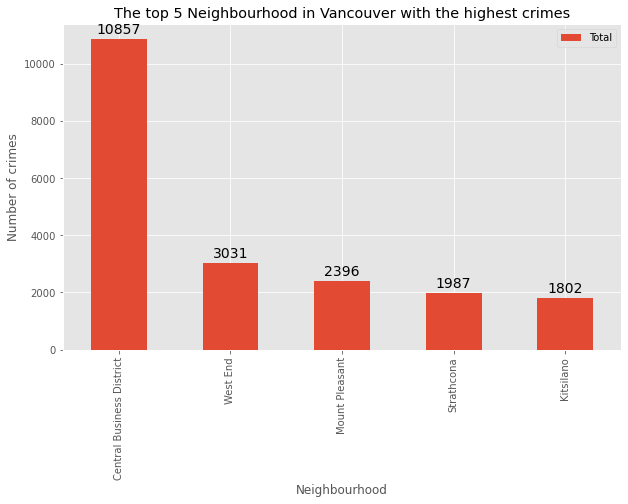

In [33]:
per_neighbourhood = Van_crimes_df_top5[['NEIGHBOURHOOD', 'Total']]
per_neighbourhood.set_index('NEIGHBOURHOOD', inplace=True)

ax = per_neighbourhood.plot(kind='bar',
                       figsize=(10,6))
ax.set_ylabel('Number of crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('The top 5 Neighbourhood in Vancouver with the highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [34]:
Van_crimes_df_low5 = Van_crimes_df.tail(5)
Van_crimes_df_low5

,NEIGHBOURHOOD,YEARBreak and Enter Commercial,YEARBreak and Enter Residential/Other,YEARMischief,YEAROther Theft,YEARTheft from Vehicle,YEARTheft of Bicycle,YEARTheft of Vehicle,YEARVehicle Collision or Pedestrian Struck (with Fatality),YEARVehicle Collision or Pedestrian Struck (with Injury),Total
23,West Point Grey,18,71,50,11,157,32,11,0,22,372
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
17,South Cambie,22,42,41,38,111,19,8,0,11,292
18,Stanley Park,6,2,8,0,109,14,3,0,12,154
12,Musqueam,0,4,3,0,4,2,2,0,2,17


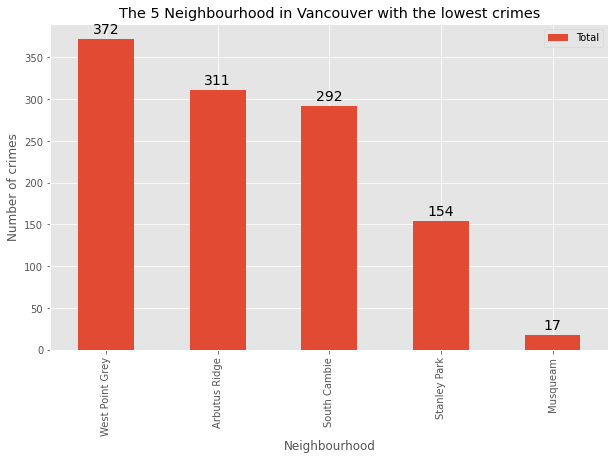

In [19]:
per_neighbourhood = Van_crimes_df_low5[['NEIGHBOURHOOD', 'Total']]
per_neighbourhood.set_index('NEIGHBOURHOOD', inplace=True)

ax = per_neighbourhood.plot(kind='bar',
                       figsize=(10,6))
ax.set_ylabel('Number of crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('The 5 Neighbourhood in Vancouver with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [35]:
Latitude = []
Longitude = []
Neighbourhood = Van_crimes_df['NEIGHBOURHOOD'].unique()

key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    
print(Latitude, Longitude)

[49.2807848, 49.24966, 49.2841308, 49.2633296, 49.279554, 49.2694099, 49.2641128, 49.2420242, 49.2705588, 49.2476321, 49.2775935, 49.2195929, 49.2474381, 49.2092233, 49.2184156, 49.2242738, 49.2308288, 49.2534601, 49.2346728, 49.2518626, 49.2644843, 49.2409677, 49.2466847, 49.3019112, 49.2346005] [-123.124856, -123.11934, -123.1317949, -123.0965885, -123.0899788, -123.155267, -123.1268352, -123.0576794, -123.0679417, -123.0842067, -123.0439199, -123.0902386, -123.1029664, -123.1361495, -123.0732871, -123.0462504, -123.1311342, -123.1850439, -123.1553893, -123.1380226, -123.1854326, -123.1670008, -123.120915, -123.1415405, -123.183397]


In [37]:
neighbourhood_dict = {'Neighbourhood': Neighbourhood,'Latitude': Latitude,'Longitude':Longitude}
neighbourhood_geo = pd.DataFrame(data=neighbourhood_dict, columns=['Neighbourhood', 'Latitude', 'Longitude'], index=None)
neighbourhood_geo

,Neighbourhood,Latitude,Longitude
0,All,49.280785,-123.124856
1,Central Business District,49.249660,-123.119340
2,West End,49.284131,-123.131795
3,Mount Pleasant,49.263330,-123.096588
4,Strathcona,49.279554,-123.089979
5,Kitsilano,49.269410,-123.155267
6,Fairview,49.264113,-123.126835
7,Renfrew-Collingwood,49.242024,-123.057679
8,Grandview-Woodland,49.270559,-123.067942
9,Kensington-Cedar Cottage,49.247632,-123.084207


In [38]:
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


In [44]:
Van_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, Neighbourhood in zip(neighbourhood_geo['Latitude'], neighbourhood_geo['Longitude'], neighbourhood_geo['Neighbourhood']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(Van_map)
    
Van_map

In [60]:
kclusters = 5
Van_clustered = Van_crimes_df.drop('NEIGHBOURHOOD', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Van_clustered)
kmeans.labels_[0:10]
neighbourhood_geo.insert(0, 'Cluster Labels', kmeans.labels_)

In [61]:
vancouver_merged = neighbourhood_geo
vancouver_merged.head()

,Cluster Labels,Neighbourhood,Latitude,Longitude
0,1,All,49.280785,-123.124856
1,2,Central Business District,49.249660,-123.119340
2,3,West End,49.284131,-123.131795
3,4,Mount Pleasant,49.263330,-123.096588
4,4,Strathcona,49.279554,-123.089979


In [62]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, lon],
    radius=5,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],
    fill_opacity=0.7).add_to(map_clusters)
        
map_clusters

## Results

Attending the goal of this project, we have been analysing the safiest neighbourhood in Vancouver, ours stakholders are specially investor to oppen a new bussisnes or a family looking for a safe place to move in.

## Conclusion

We get through some analyses comparing which neighbourhood are the safiest and which are the most dangeours, we also check by the kind of crime.